In [1]:
import datetime
import math
import os
import numpy as np
import pandas as pd

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

#https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [2]:
def plot_measures(values,labels,titulo, x_rotation, fig_size=(8,8)):
        
    ind = np.arange(len(labels))  # the x locations for the groups
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots(figsize=fig_size)
    rects1 = ax.bar(ind, values, width,color='SkyBlue')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Conteos')
    ax.set_title(titulo)
    ax.set_xticks(ind)
    ax.set_xticklabels(labels,rotation = x_rotation)
    
    autolabel(rects1,ax, "center")
    plt.show()
    
def autolabel(rects, ax,xpos='center'):
    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                height, ha=ha[xpos], va='bottom')    

In [3]:
data_dir = os.path.join('data xm','Demanda','Demanda Comercial Por Comercializador')
data_list = list()
real_columns_names = ['Fecha','Codigo Comercializador','Mercado'] + [str(i) for i in np.arange(24)] + ['Version']

In [4]:
shape_count = 0
for root, dirs, files in os.walk(data_dir, topdown=False):
    for file in files:
        f = pd.read_excel(os.path.join(root,file),skiprows=2)
        f.columns = real_columns_names
        shape_count += f.shape[0]
        data_list.append(f)
        print(os.path.join(root,file),f.shape)

Index(['Fecha', 'Codigo Comercializador', 'Mercado', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', 'Version'],
      dtype='object')
data xm\Demanda\Demanda Comercial Por Comercializador\Demanda_Comercial_Por_Comercializador_2000SEM1.xlsx (16876, 28)
Index(['Fecha', 'Codigo Comercializador', 'Mercado', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', 'Version'],
      dtype='object')
data xm\Demanda\Demanda Comercial Por Comercializador\Demanda_Comercial_Por_Comercializador_2000SEM2.xlsx (17180, 28)
Index(['Fecha', 'Codigo Comercializador', 'Mercado', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', 'Version'],
      dtype='object')
data xm\Demanda\Demanda Comercial Por Comercializador\Deman

Index(['Fecha', 'Codigo Comercializador', 'Mercado', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', 'Version'],
      dtype='object')
data xm\Demanda\Demanda Comercial Por Comercializador\Demanda_Comercial_Por_Comercializador_2012SEM1.xlsx (17380, 28)
Index(['Fecha', 'Codigo Comercializador', 'Mercado', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', 'Version'],
      dtype='object')
data xm\Demanda\Demanda Comercial Por Comercializador\Demanda_Comercial_Por_Comercializador_2012SEM2.xlsx (17829, 28)
Index(['Fecha', 'Codigo Comercializador', 'Mercado', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', 'Version'],
      dtype='object')
data xm\Demanda\Demanda Comercial Por Comercializador\Deman

In [5]:
full_data = pd.concat(data_list)
assert shape_count == full_data.shape[0], 'No coinciden las dimensiones'

In [6]:
full_data.dropna(inplace=True,how='all')

In [7]:
full_data.shape

(720192, 28)

In [8]:
full_data.columns

Index(['Fecha', 'Codigo Comercializador', 'Mercado', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', 'Version'],
      dtype='object')

# Codigo Comercializador

In [9]:
datos_copy = full_data.copy()

In [10]:
codigo_comercializador_unicos = pd.unique(datos_copy['Codigo Comercializador'])

In [12]:
'Cantidad de Comercializadores Unicos: {}'.format(len(codigo_comercializador_unicos))

'Cantidad de Comercializadores Unicos: 220'

In [13]:
comercializador_unicos_conteo = datos_copy.groupby('Codigo Comercializador')['Fecha'].count()
comercializador_unicos_conteo = comercializador_unicos_conteo.sort_values(ascending=False)

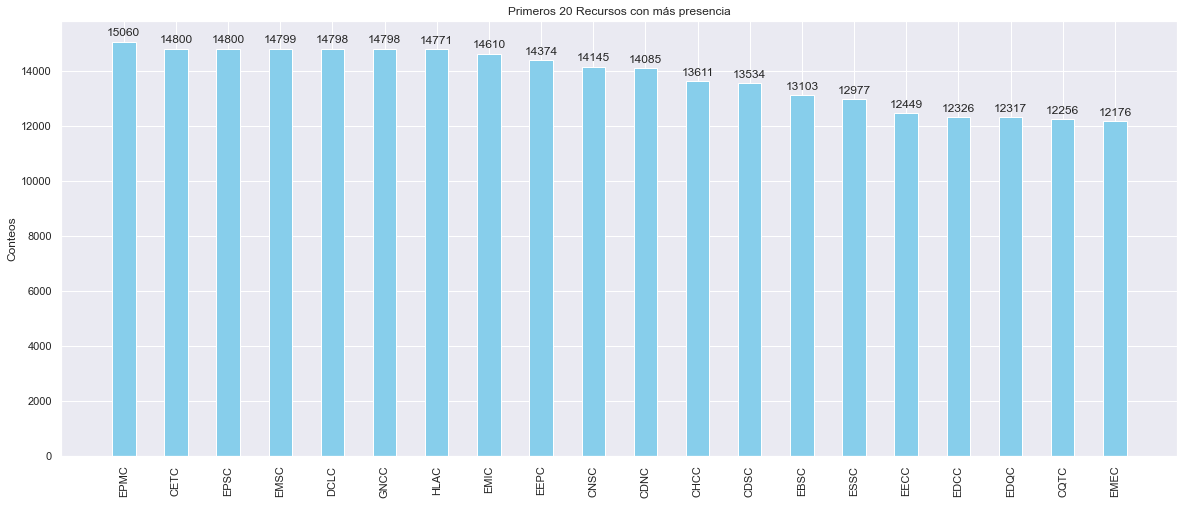

In [14]:
comercializador_unicos_primeros = comercializador_unicos_conteo[:20]
values = comercializador_unicos_primeros.values
labels = comercializador_unicos_primeros.index
plot_measures(values,labels,'Primeros 20 Recursos con más presencia',x_rotation=90,fig_size=(20,8))

# Mercado

In [16]:
datos_copy = full_data.copy()

In [17]:
mercados_unicos = pd.unique(datos_copy['Mercado'])

In [18]:
'Cantidad de Mercados Unicos: {}'.format(len(mercados_unicos))

'Cantidad de Mercados Unicos: 3'

In [20]:
mercados_unicos_conteo = datos_copy.groupby('Mercado')['Fecha'].count()
mercados_unicos_conteo = mercados_unicos_conteo.sort_values(ascending=False)

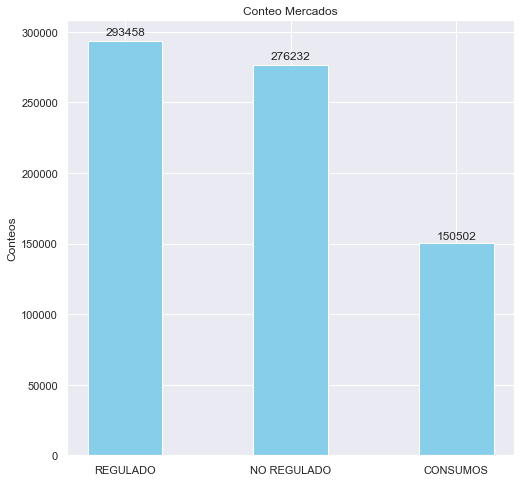

In [21]:
values = mercados_unicos_conteo.values
labels = mercados_unicos_conteo.index
plot_measures(values,labels,'Conteo Mercados',x_rotation=0)

## Agrupar por Fecha, Comercializador y Mercado

In [22]:
def agrupar_por_fecha_comercializador_mercado(grupo):
    
    columnas_horas = [str(i) for i in np.arange(24)]
    columnas_horas_suma = grupo[columnas_horas].sum()
    
    version = grupo['Version'].tolist()[0]
    
    S1 = pd.Series(columnas_horas_suma,index=columnas_horas)
    S1 = S1.append(pd.Series([version],index=['Version']))

    return S1

In [23]:
datos_copy = full_data.copy()

In [24]:
datos_copy.fillna(value=0, inplace=True)

In [25]:
datos_agrupados = datos_copy.groupby(['Fecha','Codigo Comercializador','Mercado']).apply(agrupar_por_fecha_comercializador_mercado)
datos_agrupados = datos_agrupados.reset_index()

In [26]:
fecha_idx = datos_agrupados[datos_agrupados['Fecha'] == 'Fecha'].index
datos_agrupados = datos_agrupados.drop(index=fecha_idx)

# GENERAR DATASET CON SERIE POR TIPO DE MERCADO

In [27]:
def construir_dataset(df_transpuesto):
    lambda_horas = lambda x: pd.Timedelta(datetime.datetime.strptime(x,'%H').hour, unit='hours')
    
    df_transpuesto['Fecha'] =  pd.to_datetime(df_transpuesto['Fecha'], format='%Y-%m-%d')
    df_transpuesto['variable'] = df_transpuesto['variable'].map(lambda_horas)
    
    df_transpuesto['Fecha'] = df_transpuesto['Fecha'] +  df_transpuesto['variable']
    df_transpuesto = df_transpuesto.sort_values(['Codigo Comercializador','Fecha'])
    df_transpuesto.drop('variable', axis=1, inplace = True)
    df_transpuesto.rename(columns={"value": "kWh"}, inplace = True)
    
    return df_transpuesto

In [28]:
def dividir_guardar_dataset(dataset,dataset_path,dataset_name):
    maximas_filas_excel = 1048576
    filas_dataset = dataset.shape[0]
    divisiones = 1
    
    if filas_dataset > maximas_filas_excel:
        divisiones = math.ceil(filas_dataset/maximas_filas_excel)
        
    lista_dataset = np.array_split(dataset, divisiones)
    for idx,df in enumerate(lista_dataset):
        df.to_excel(os.path.join(dataset_path,'{}_{}.xlsx'.format(dataset_name,idx)))
        print('---> Tamaño División: {}'.format(df.shape))

In [29]:
datos_agrupados_copy = datos_agrupados.copy()

In [30]:
tipos_mercado_unicos = pd.unique(datos_agrupados_copy['Mercado'])

In [31]:
tipos_mercado_unicos = [i for i in tipos_mercado_unicos if not isinstance(i, float)]
tipos_mercado_unicos

['REGULADO', 'CONSUMOS', 'NO REGULADO']

In [34]:
df_regulado = None
for i in tipos_mercado_unicos:
    print('{}'.format(i))
    
    df_tipo_mercado = datos_agrupados_copy[datos_agrupados_copy['Mercado']==i].copy()
    
    df_transpuesto = pd.melt(df_tipo_mercado,
                         id_vars=['Fecha', 'Codigo Comercializador','Mercado','Version'],
                         value_vars=[str(i) for i in np.arange(24)])

    dataset_tipo_mercado = construir_dataset(df_transpuesto)
    
    if 'REGULADO' in i:
        df_regulado = dataset_tipo_mercado
    
    dataset_path = os.path.join('data series','Demanda','Por Comercializador')
    if not os.path.exists(dataset_path):
        os.makedirs(dataset_path)
        
    dividir_guardar_dataset(dataset_tipo_mercado,dataset_path,dataset_name=i)

REGULADO
---> Tamaño División: (1006142, 5)
---> Tamaño División: (1006142, 5)
---> Tamaño División: (1006142, 5)
---> Tamaño División: (1006142, 5)
---> Tamaño División: (1006142, 5)
---> Tamaño División: (1006141, 5)
---> Tamaño División: (1006141, 5)
CONSUMOS
---> Tamaño División: (903012, 5)
---> Tamaño División: (903012, 5)
---> Tamaño División: (903012, 5)
---> Tamaño División: (903012, 5)
NO REGULADO
---> Tamaño División: (947082, 5)
---> Tamaño División: (947081, 5)
---> Tamaño División: (947081, 5)
---> Tamaño División: (947081, 5)
---> Tamaño División: (947081, 5)
---> Tamaño División: (947081, 5)
---> Tamaño División: (947081, 5)


# Visualización de los datos

In [35]:
def obtener_datos_por_comercializador(data,comercializador):
    
    datos_comercializador = data[data['Codigo Comercializador'] == comercializador]
    datos_comercializador = datos_comercializador.copy()

    datos_comercializador = datos_comercializador.set_index('Fecha')
    
    datos_comercializador['Año'] = datos_comercializador.index.year
    datos_comercializador['Mes'] = datos_comercializador.index.month
    datos_comercializador['Dia'] = datos_comercializador.index.day_name()
    
    return datos_comercializador

In [36]:
def grafico_comportamiento(datos):
    cols_plot = ['kWh']
    nombre_graficas = ['kWh']
    axes = datos[cols_plot].plot(alpha=0.8, linestyle='-', figsize=(15, 5), subplots=True)
    for ax,name in zip(axes,nombre_graficas):
        ax.set_ylabel(name)

In [37]:
def grafico_comportamiento_por_mes(datos):
    fig, ax = plt.subplots(1, 1, figsize=(15, 5), sharex=True)
    
    sns.boxplot(data=datos, x='Mes', y='kWh', ax=ax)
    ax.set_title('kWh')

In [38]:
def grafico_filtrado_fecha(datos,fecha_min,fecha_max):
    ax = datos.loc[fecha_min:fecha_max, 'kWh'].plot(marker='o',linestyle='-',figsize=(15, 5))
    ax.set_ylabel('kWh');

In [39]:
def grafico_resampling_rolling_window(datos,fecha_min,fecha_max):
    cols_plot = ['kWh']
    datos_7d = datos[cols_plot].rolling(7, center=True).mean()

    fig, ax = plt.subplots(figsize=(15, 5))

    ax.plot(datos.loc[fecha_min:fecha_max, 'kWh'],
    marker='.', linestyle='-', linewidth=0.5, label='Diaria')

    ax.plot(datos_7d.loc[fecha_min:fecha_max, 'kWh'],linestyle='-', label='Media Movil 7-Días')

    ax.set_ylabel('kWh')
    ax.legend();

In [41]:
comercializador = obtener_datos_por_comercializador(df_regulado,comercializador='EPMC')

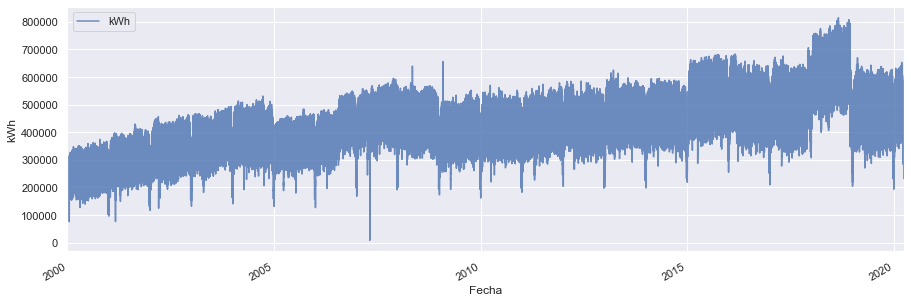

In [42]:
grafico_comportamiento(comercializador)

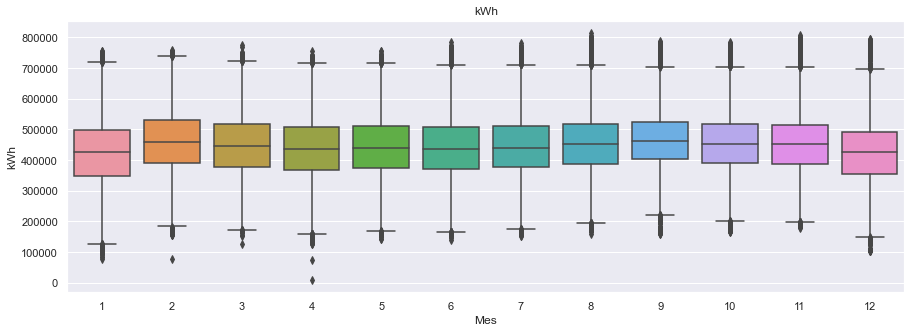

In [43]:
grafico_comportamiento_por_mes(comercializador)

In [44]:
'Fecha Mínima {} - Fecha Máxima {}'.format(comercializador.index.min(),comercializador.index.max())

'Fecha Mínima 2000-01-01 00:00:00 - Fecha Máxima 2020-04-03 23:00:00'

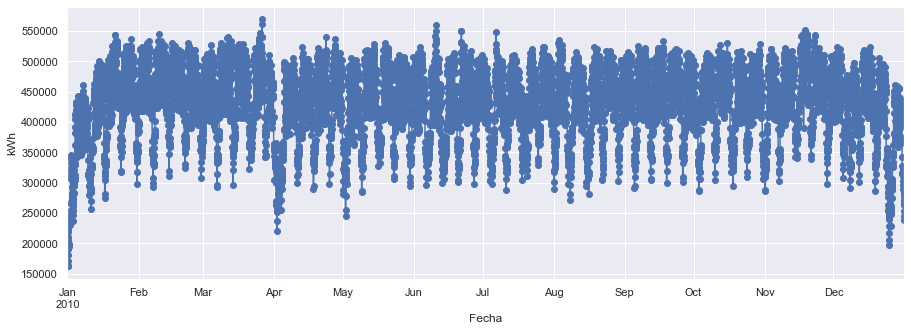

In [46]:
grafico_filtrado_fecha(datos=comercializador,fecha_min='2010-01',fecha_max='2010-12')

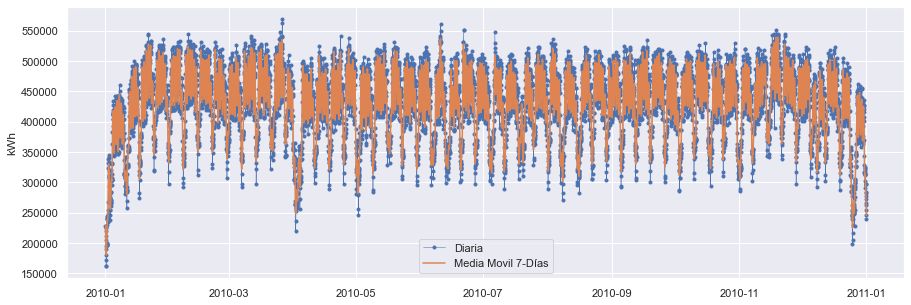

In [48]:
grafico_resampling_rolling_window(datos=comercializador,fecha_min='2010-01',fecha_max='2010-12')